# <center>  Identifying and Predicting a Pulsar using Classification </center>

## Introduction

  Pulsars are intensively magnetized, rapidly rotating neutron stars that emit periodic radio frequencies. They are of considerable scientific interest as probes of space-time, the interstellar medium, and states of matter. One of the characteristics of pulsars is two high energy emission beams coming from the poles of the star. Paired with the rapid revolution of the star, these beams act akin to a lighthouse lamp, sending waves across the entire universe. These waves are picked up on earth as broadband radio waves.
  
On earth, scientists are able to pick and decipher all sorts of signals from space but the difficulty lies in interpreting the signals to understand their source. In recent years one of the signals scientists have been picking up is periodic radio signal blips which are associated with pulsars. 

Astronomers are using the periodicity and other variables to determine whether radio signals received on earth are stemming from pulsars or rather noise from the instruments used to gather data. This is not as simple as it may seem as pulsars have different profiles thus having a considerable amount of variabilities. These pulsars can have different spin rates, different emission strengths, different distances related to the earth, which poses a problem of identification. Meanwhile, differentiating between the various pulsar profiles and the radio frequency interference (RFI) is another task at hand. Here is an image of a pulsar. Click the image and there will be an introduction video to help you understand what a pulsar is.

[![Pulsar](https://miro.medium.com/max/675/1*2Qc-LgISWCcZ6F65qFHDLA.jpeg)](https://www.youtube.com/watch?v=gjLk_72V9Bw)

Source: https://miro.medium.com/max/675/1*2Qc-LgISWCcZ6F65qFHDLA.jpeg



The goal of the investigation will be to answer the following question:
### How accurately does K-Nearest Neighbors classification system predict a legitimate pulsar?



The dataset we decide to exploit is HTRU2, which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey. A pulsar candidate can be regarded as a single potential signal detection which is averaged over many rotations of the pulsar, as determined by the length of each observation. In general, the dataset comprises of featured vectors of a pulsar and other astronomical candidates. Besides, it contains 16,259 spurious examples caused by RFI/noise and 1,639 real pulsar examples.

The columns in the dataset are:

- **Descriptions - Features**
- `Mean of the integrated profile` - $Prof_{\mu}$

- `Standard deviation of the integrated profile.`- $Prof_{\sigma}$

- `Excess kurtosis of the integrated profile.`- $Prof_{k}$

- `Skewness of the integrated profile.`- $Prof_{s}$

These four variables are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency.

- `Mean of the DM-SNR curve.` - $DM_{\mu}$

- `Standard deviation of the DM-SNR curve.` - $DM_{\sigma}$

- `Excess kurtosis of the DM-SNR curve.` - $DM_{k}$

- `Skewness of the DM-SNR curve.` - $DM_{s}$

The remaining four variables are similarly obtained from the DM-SNR curve, which is a dispersion measuring signal-signal to noise ratio.

- `Class`- Determine whether each observation is a pulsar star or not. The class labels used are 0 (negative) and 1 (positive).

## Methods & Results


#### Exploratory data analysis

In [1]:
# Download the necessary packages and load the libraries before continuing.

library(tidyverse)
library(repr)
library(caret)
install.packages("GGally")
library(GGally)
install.packages('MLmetrics')
library(MLmetrics)
install.packages('e1071', dependencies=TRUE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:dplyr’:

    nasa


Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

To begin with, let us load the data from the original source on the web into the notebook. Use functions in tidyverse library to provide a glimpse of the dataset.

In [2]:
# load the raw dataset from the github
pulsar <- read_csv("https://raw.githubusercontent.com/blackswanblood/dsci100-project/master/pulsar_stars.csv")
head(pulsar)
glimpse(pulsar)

Parsed with column specification:
cols(
  `Mean of the integrated profile` = col_double(),
  `Standard deviation of the integrated profile` = col_double(),
  `Excess kurtosis of the integrated profile` = col_double(),
  `Skewness of the integrated profile` = col_double(),
  `Mean of the DM-SNR curve` = col_double(),
  `Standard deviation of the DM-SNR curve` = col_double(),
  `Excess kurtosis of the DM-SNR curve` = col_double(),
  `Skewness of the DM-SNR curve` = col_double(),
  target_class = col_double()
)



Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


Observations: 17,898
Variables: 9
$ `Mean of the integrated profile`               <dbl> 140.56250, 102.50781, …
$ `Standard deviation of the integrated profile` <dbl> 55.68378, 58.88243, 39…
$ `Excess kurtosis of the integrated profile`    <dbl> -0.23457141, 0.4653181…
$ `Skewness of the integrated profile`           <dbl> -0.69964840, -0.515087…
$ `Mean of the DM-SNR curve`                     <dbl> 3.1998328, 1.6772575, …
$ `Standard deviation of the DM-SNR curve`       <dbl> 19.110426, 14.860146, …
$ `Excess kurtosis of the DM-SNR curve`          <dbl> 7.975532, 10.576487, 7…
$ `Skewness of the DM-SNR curve`                 <dbl> 74.24222, 127.39358, 6…
$ target_class                                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0…


Let's start wrangle and clean the data!
- There is no `NA` value in every observation, so we do not need to remove it.
 > **Note** that IP stands for the integrated profile and DS stands for the DM-SNR curve.
- Next, we will replace the `target_class` with `class`, and substitute 0 and 1 with *Negative* and *Positive* respectively.
- Change the variable `class` to a factor in preparation for the further classification.
- Finally, to avoid naming dataframe columns using names that contain spaces, we use `make.names` function to substitute period for space.

In [3]:
# create a column called class
pulsar_data <- pulsar %>%
          mutate(class = ifelse (target_class == 0,"Negative","Positive"))%>%
          select(-target_class)
pulsar_data$class <- as.factor(pulsar_data$class)
colnames(pulsar_data)<- make.names(c("Mean of the IP","Standard deviation of IP","Excess kurtosis of IP","Skewness of IP","Mean of DS","Standard deviation of DS","Excess kurtosis of DS","Skewness of DS","class"))
head(pulsar_data)

Mean.of.the.IP,Standard.deviation.of.IP,Excess.kurtosis.of.IP,Skewness.of.IP,Mean.of.DS,Standard.deviation.of.DS,Excess.kurtosis.of.DS,Skewness.of.DS,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,Negative
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,Negative
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,Negative
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,Negative
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,Negative
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,Negative


Moreover, we will make a summary of the data set that is relevant for exploratory data analysis. Also, visualizing the means and standard deviations of each variable gives the readers an intuition about the statistical features and the distribution of the data set. The table exhibits that 90.84% of the observations are negative while 9.157% are positive.

>**Notation**: 
- (a,b,c,d,e,f,g,h,i indicate the original column names in the dataset. i.e. a represents 'Mean.of.the.IP')
- 'sd' means standard deviation.

class,n,percentage,mean_a,mean_b,mean_c,mean_d,mean_e,mean_f,mean_g,mean_h,sd_a,sd_b,sd_c,sd_d,sd_e,sd_f,sd_g,sd_h
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,16259,90.842552,116.56273,47.33974,0.2104401,0.380844,8.863258,23.28798,8.862674,113.62034,17.47593,6.182929,0.334606,1.027791,24.41141,16.65143,4.238626,106.72193
Positive,1639,9.157448,56.69061,38.71060,3.1306554,15.553576,49.825995,56.46896,2.757069,17.93173,30.00771,8.033614,1.872861,13.997200,45.28793,19.73108,3.105945,50.89626


class,statistic_characteristic,value
<fct>,<chr>,<dbl>
Negative,mean_a,116.5627263
Positive,mean_a,56.6906078
Negative,mean_b,47.3397408
Positive,mean_b,38.7105983
Negative,mean_c,0.2104401
Positive,mean_c,3.1306554


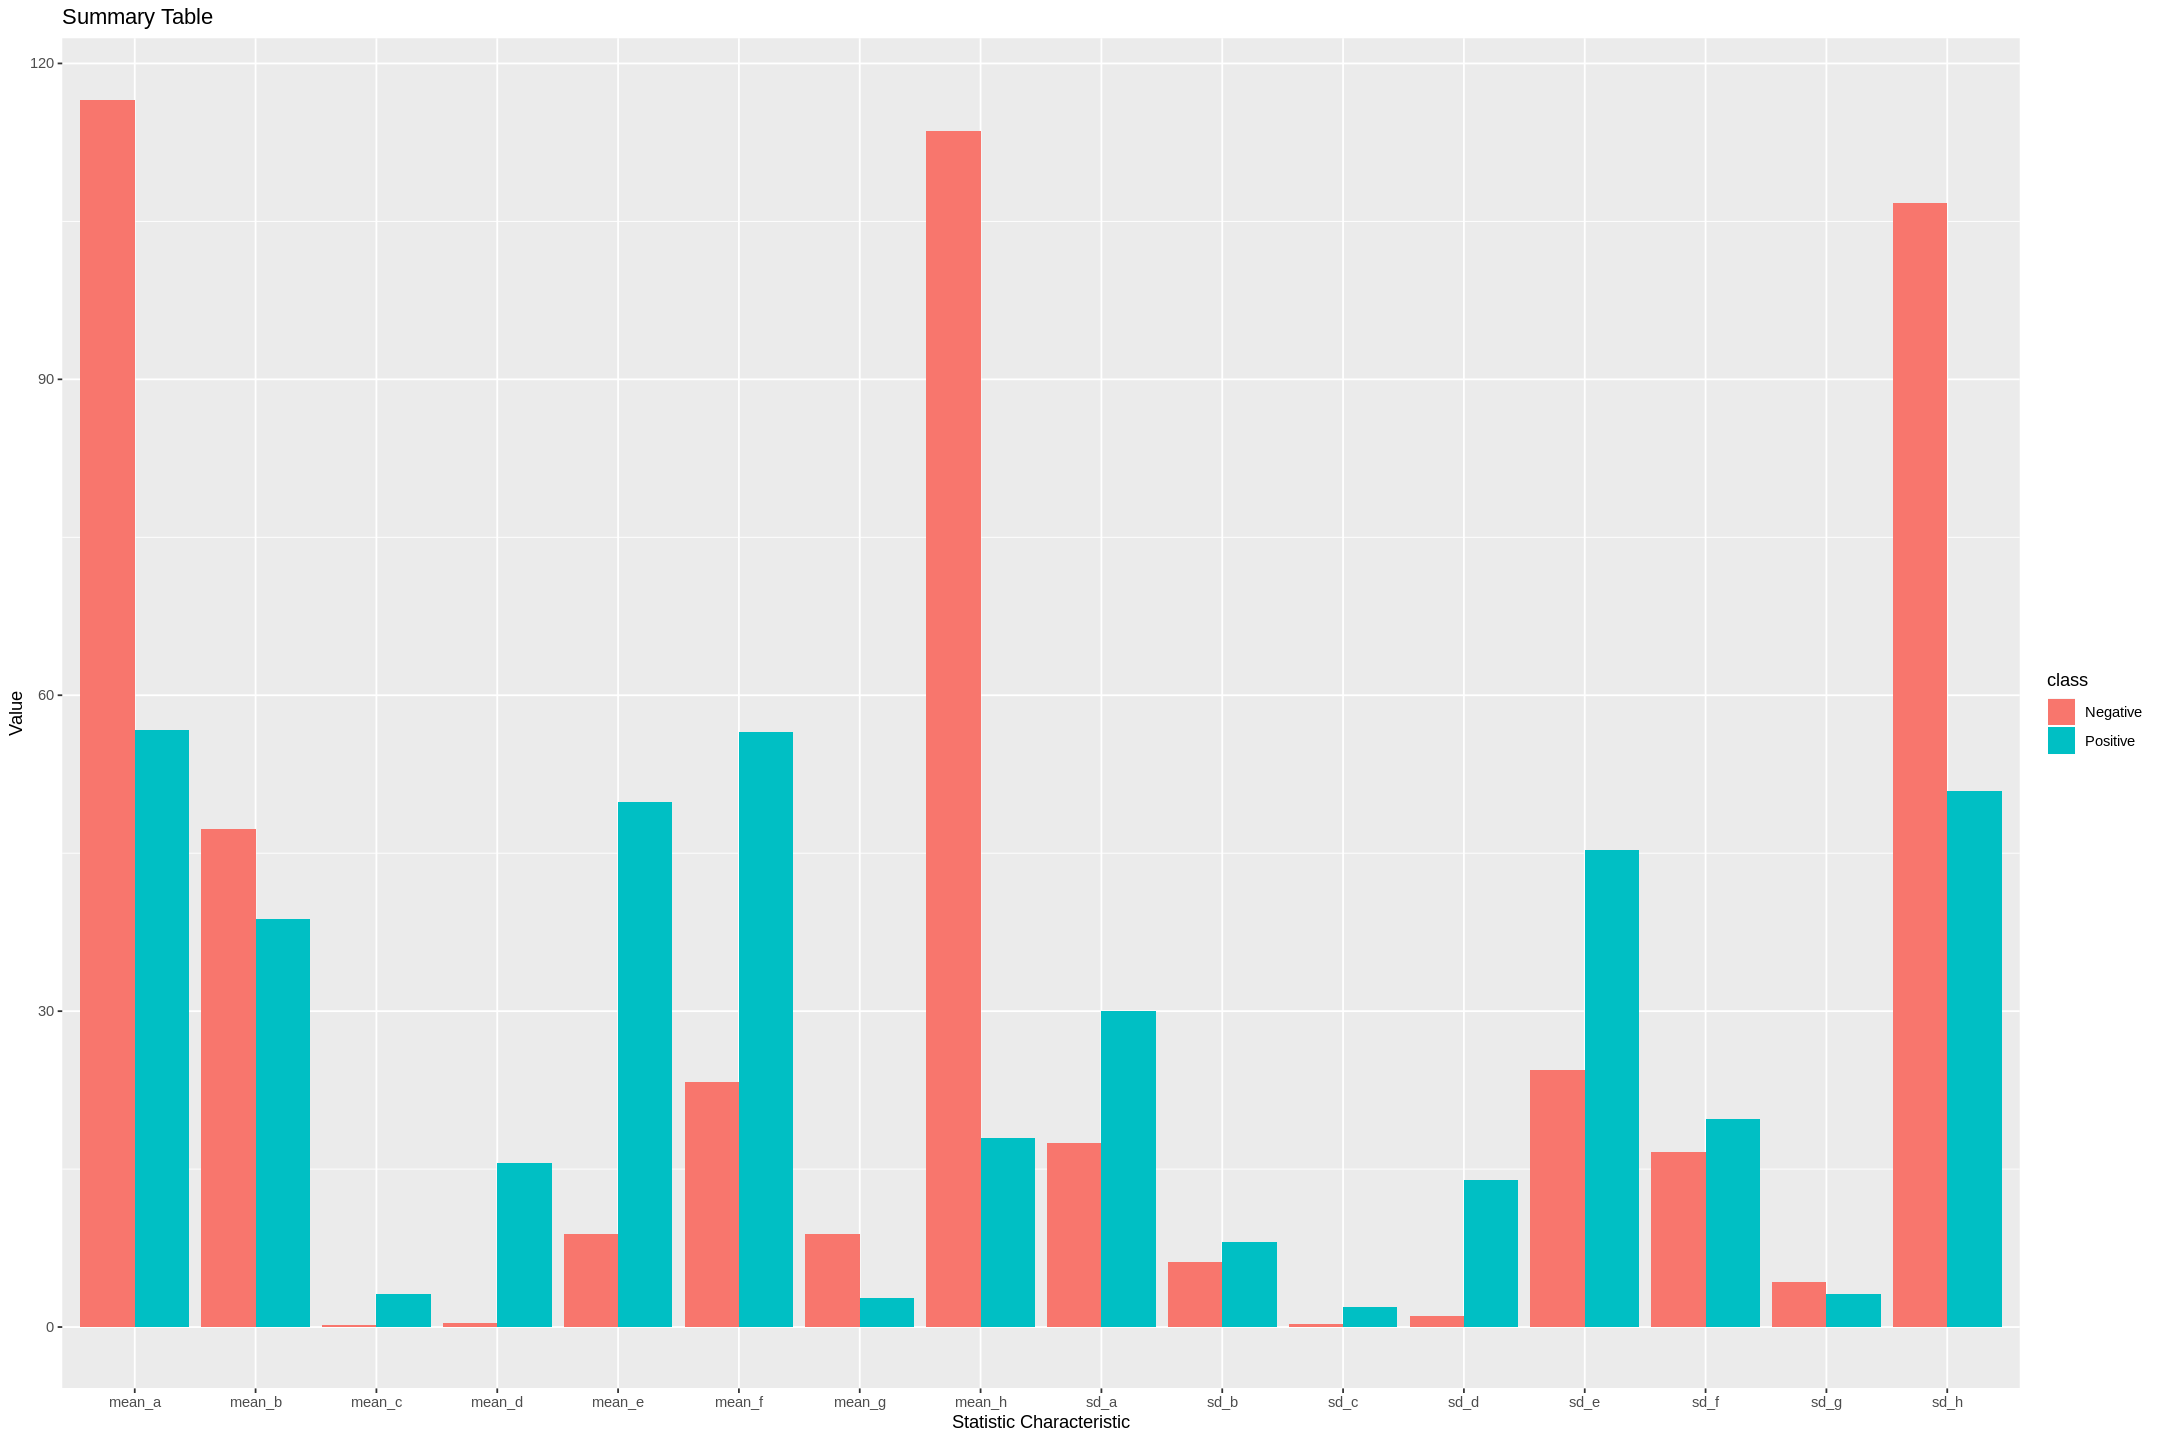

In [5]:
# summary in a table
num_obs <- nrow(pulsar_data)
summary <- pulsar_data %>% 
  group_by(class) %>% 
  summarize(n = n(),
            percentage = n() / num_obs * 100,
            mean_a=mean(Mean.of.the.IP),
            mean_b=mean(Standard.deviation.of.IP),
           mean_c=mean(Excess.kurtosis.of.IP),
           mean_d=mean(Skewness.of.IP),
           mean_e=mean(Mean.of.DS),
           mean_f=mean(Standard.deviation.of.DS),
           mean_g=mean(Excess.kurtosis.of.DS),
           mean_h=mean(Skewness.of.DS),
           sd_a=sd(Mean.of.the.IP),
            sd_b=sd(Standard.deviation.of.IP),
           sd_c=sd(Excess.kurtosis.of.IP),
           sd_d=sd(Skewness.of.IP),
           sd_e=sd(Mean.of.DS),
           sd_f=sd(Standard.deviation.of.DS),
           sd_g=sd(Excess.kurtosis.of.DS),
           sd_h=sd(Skewness.of.DS))
summary
df <- summary %>%
      select(-n,-percentage)%>%
       gather(key="statistic_characteristic", value="value", -class)
head(df)
#plot
plot_sum <- ggplot(df, aes(x=statistic_characteristic,y=value, fill=class))+
            geom_bar(stat="identity", position=position_dodge())+
            xlab("Statistic Characteristic")+
            ylab("Value")+
            ggtitle("Summary Table")
options(repr.plot.width=18, repr.plot.height=12)
plot_sum

There is a ranking about which attributes correlate to the label the most, specifically discussed in a thesis p.233 chapter8.6 (Table 8.5). Overall, We decide to choose the top 4 variables in the ranking as our predictors, denoting $Prof_{k}, DM_{\sigma}, Prof_{\mu}\ \text{and}\ Prof_{s}$.

Meanwhile, the graph above enlightens us to compare some significant statistic charateristics of a single variable which has been labelled differently. The major discrepency of a statistical feature indicates that the variable affects the labels of the variable significantly. Moreover, it implies the difference of value of a statistic characteristic (red bar and blue bar) can be a measurement concerning which attributes correlate to the label the most. For sanity check, $Prof_{k}, DM_{\sigma}, Prof_{\mu}\ \text{and}\ Prof_{s}$ all have major discrepency between classes.
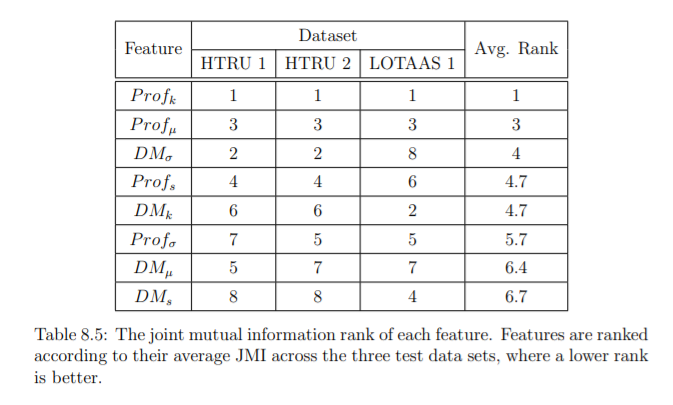
Source: [WHY ARE PULSARS
HARD TO FIND?](http://www.scienceguyrob.com/wp-content/uploads/2016/12/WhyArePulsarsHardToFind_Lyon_2016.pdf)

**Data preprocessing** is an important stage before classification, which consists of standardizing and balancing data. 
- Therefore, we are going to evaluate the necessity of **standardization** by visualizing the data before and after shifting and scaling. So the resulting graphs shall determine whether we should standardize our data or not. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



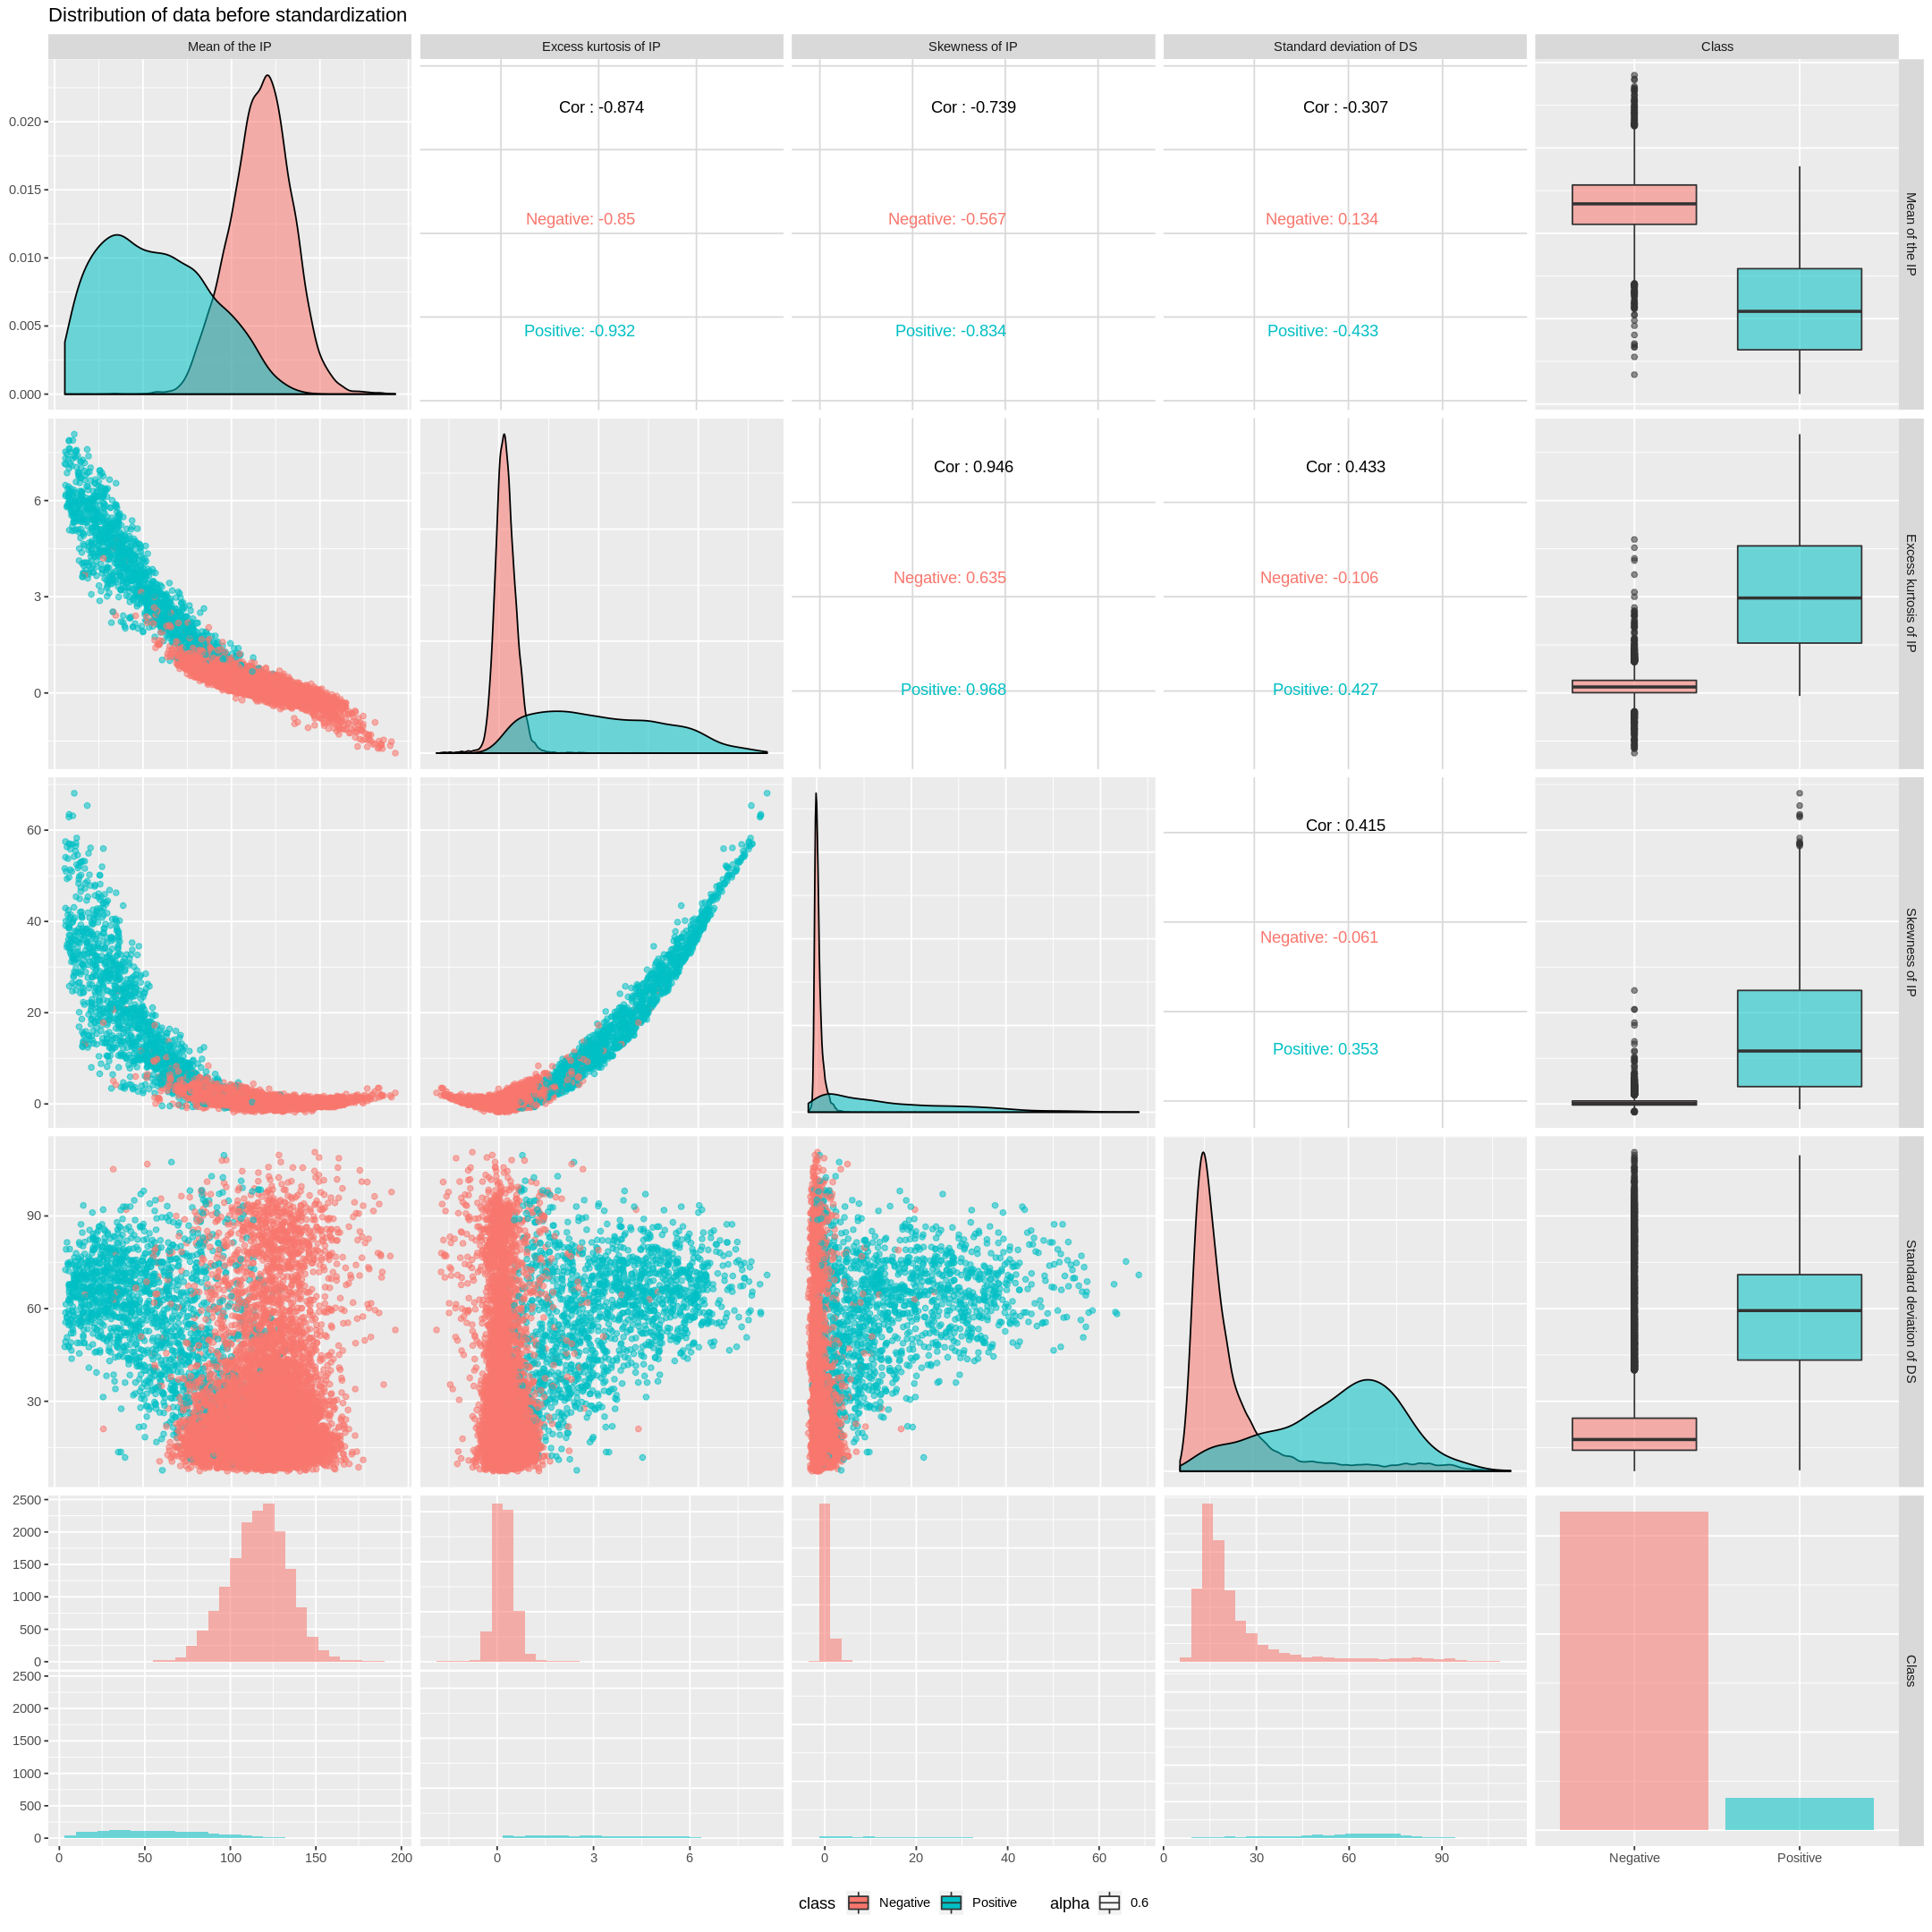

In [12]:
# Before standardization, we use ggpairs function in GGally library to viusalize the dataset
pulsar <- pulsar_data %>%
           select(Mean.of.the.IP,Excess.kurtosis.of.IP,Skewness.of.IP,Standard.deviation.of.DS,class) 
plot_bs <- ggpairs(pulsar, mapping = ggplot2::aes(colour = class, alpha = 0.6),
                  columnLabels = c("Mean of the IP","Excess kurtosis of IP","Skewness of IP","Standard deviation of DS","Class"),
                  title = "Distribution of data before standardization",
                  legend = 5)+
            theme(legend.position = "bottom")
options(repr.plot.width=18, repr.plot.height=18)
plot_bs

Subsequently, we will use `preProcess` function to create an object we can use to standardize our dataset.

In [16]:
scale_transformer <- preProcess(pulsar, method = c("center", "scale"))
scaled_pulsar <- predict(scale_transformer, pulsar)
head(scaled_pulsar)

Mean.of.the.IP,Excess.kurtosis.of.IP,Skewness.of.IP,Standard.deviation.of.DS,class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.1492849,-0.66955083,-0.4004478,-0.3706151,Negative
-0.3341589,-0.01178443,-0.3705251,-0.5889076,Negative
-0.3143634,-0.14522850,-0.1165896,-0.2353216,Negative
1.0006664,-0.51339427,-0.3901672,-0.2756588,Negative
-0.8713781,0.11560548,-0.1048632,-0.7630898,Negative
-0.6825595,0.05079471,-0.2194515,-0.6050896,Negative


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



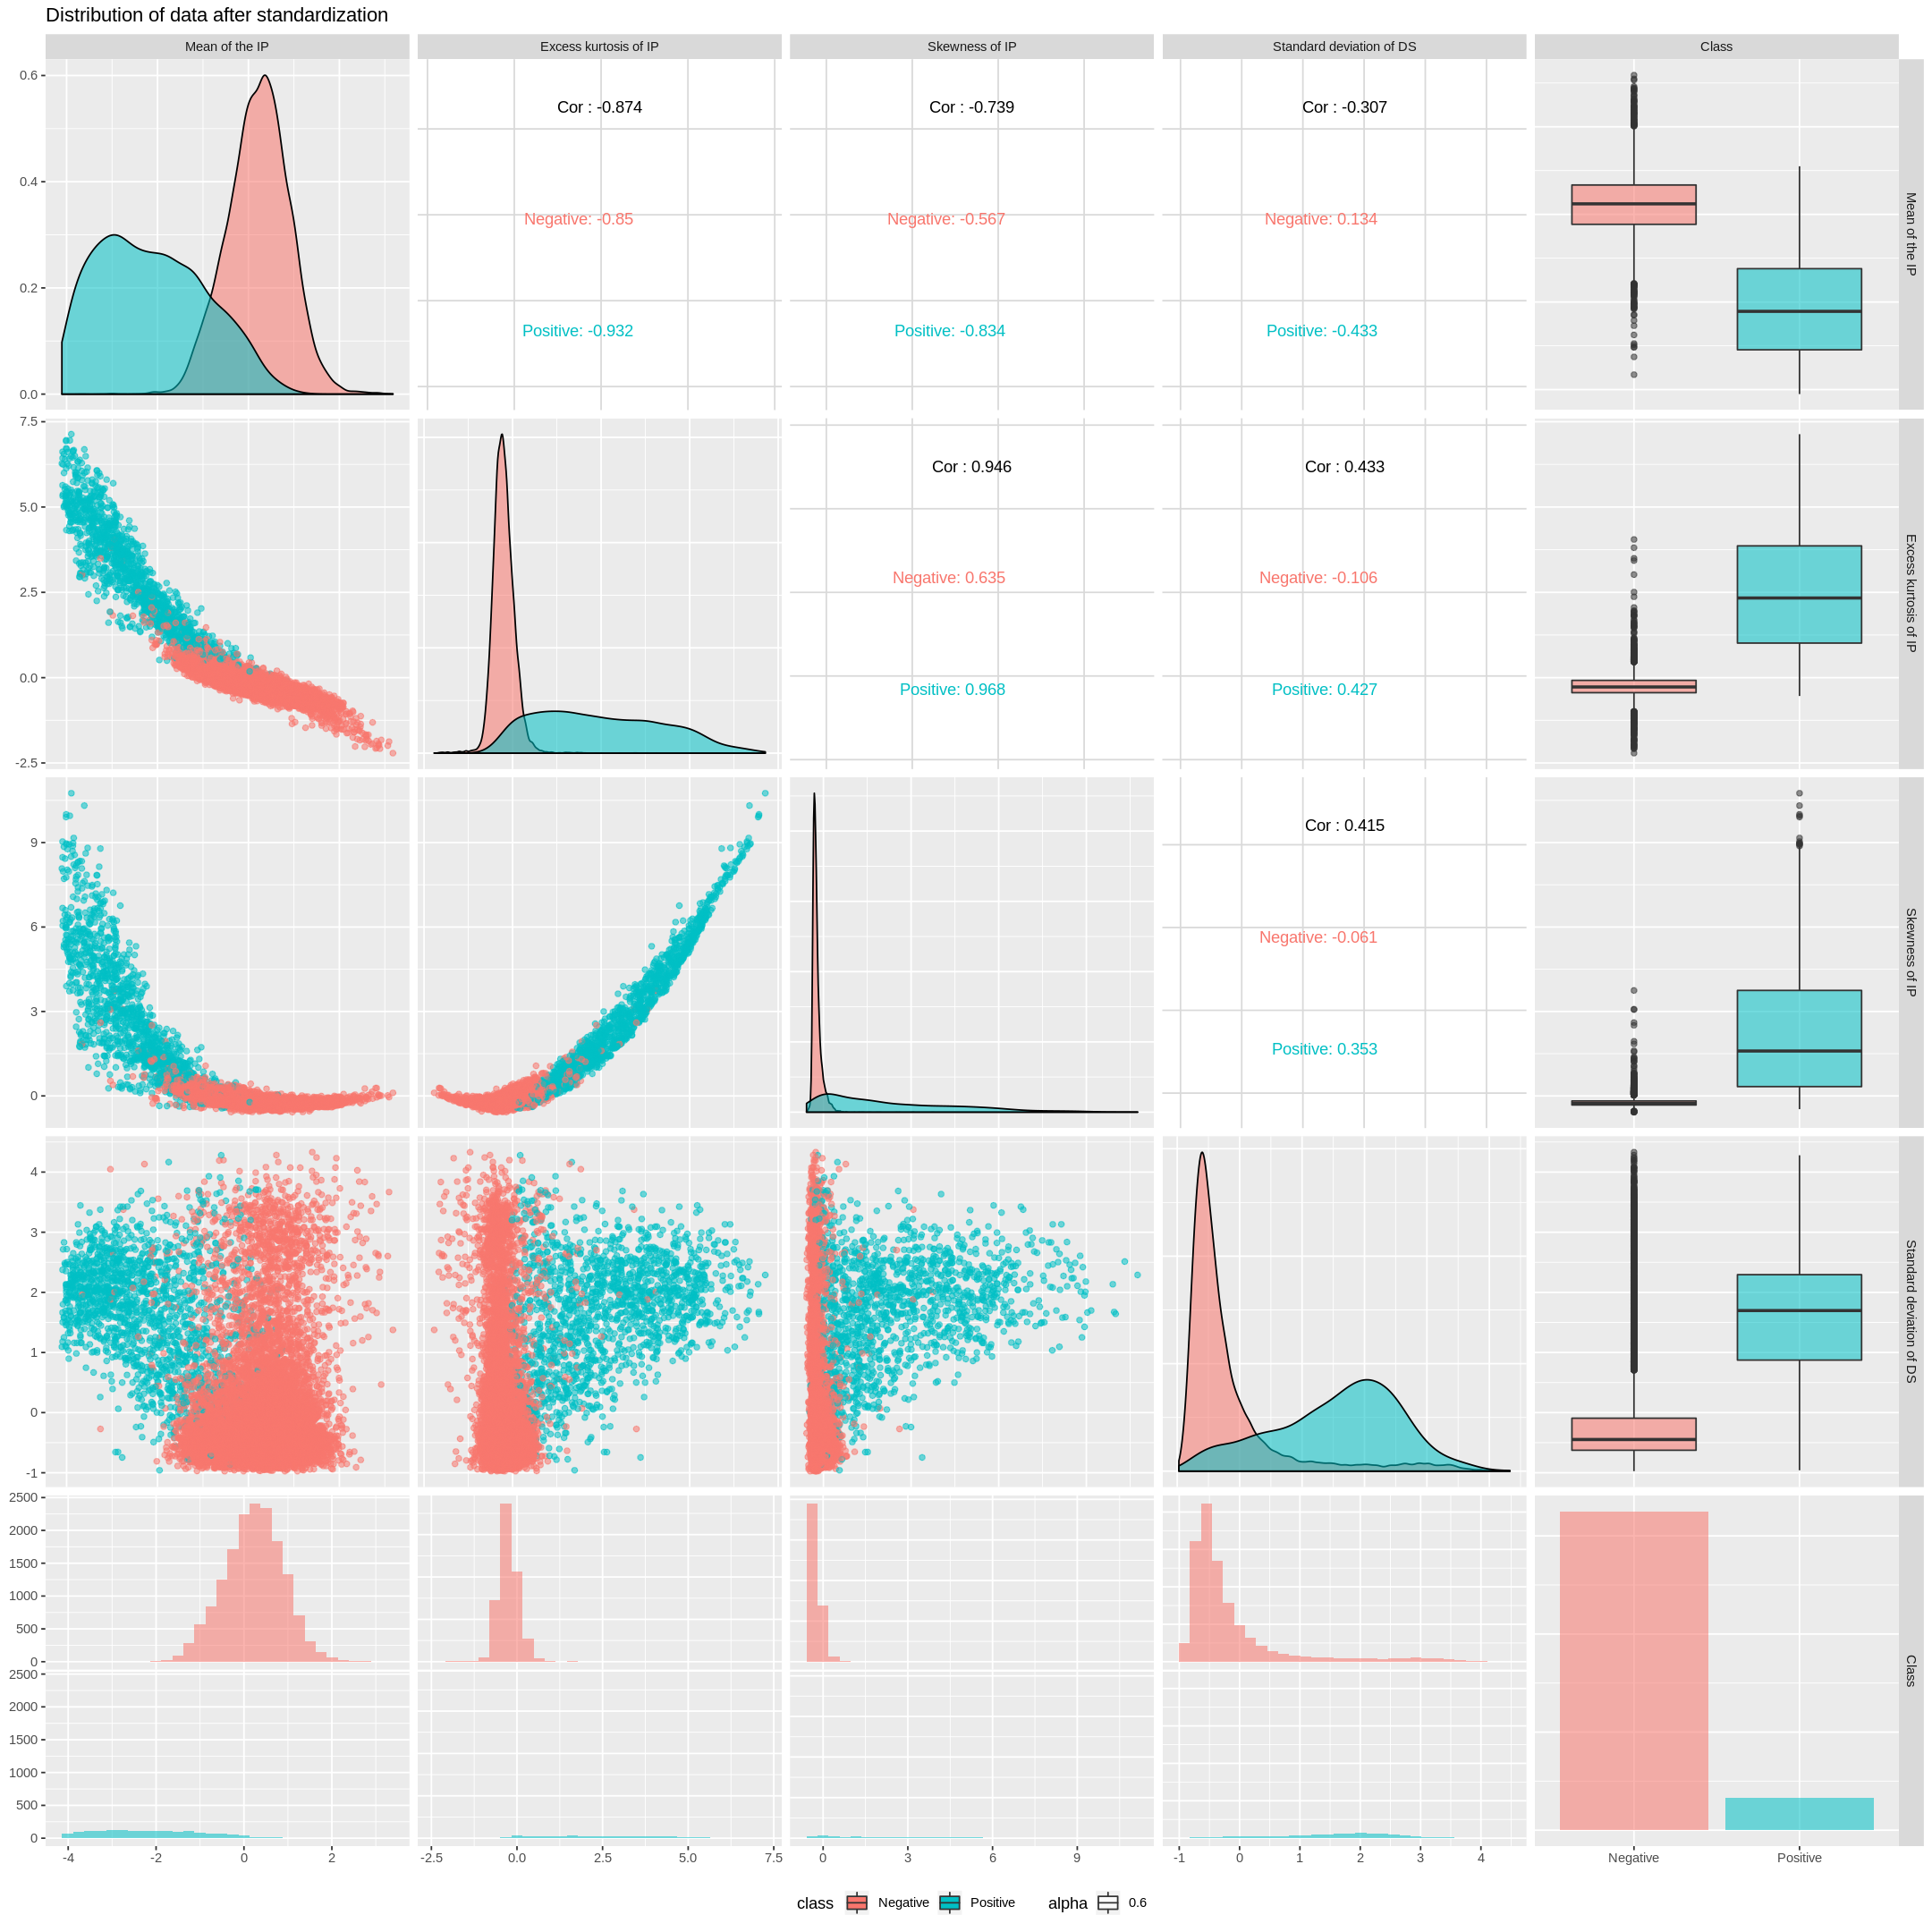

In [17]:
#After standardization, we use ggpairs function in GGally library to viusalize the dataset
plot_as <- ggpairs(scaled_pulsar, mapping = ggplot2::aes(colour = class, alpha = 0.6),
                  columnLabels = c("Mean of the IP","Excess kurtosis of IP","Skewness of IP","Standard deviation of DS","Class"),
                  title = "Distribution of data after standardization",
                  legend = 5)+
            theme(legend.position = "bottom")
options(repr.plot.width=18, repr.plot.height=18)
plot_as

The plots above look identical, but we find that $Prof_{k}, DM_{\sigma}$ vary on a large scale before standardization which may cause problems for the supervised learning algorithm. Hence, we intend to use scaled data to feed in to the knn algorithm.

Initially, we will be partitioning the original overall data set into a training (75%) and testing (25%) set.

In [18]:
# Set the seed.
set.seed(3456) 

# Randomly take 75% of the data in the training set. 
# This will be proportional to the different number of classes in the dataset.

training_rows <- pulsar %>%
                 select(class)%>%
                 unlist()%>%
                 createDataPartition(p = 0.75, list = FALSE)
head(training_rows)
training_set <- pulsar %>% slice(training_rows)
testing_set <- pulsar %>% slice(-training_rows)
head(training_set)
head(testing_set)

Resample1
1
2
3
5
6
7


Mean.of.the.IP,Excess.kurtosis.of.IP,Skewness.of.IP,Standard.deviation.of.DS,class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,-0.23457141,-0.6996484,19.110426,Negative
102.50781,0.46531815,-0.5150879,14.860146,Negative
103.01562,0.32332837,1.0511644,21.744669,Negative
88.72656,0.60086608,1.1234917,11.468720,Negative
93.57031,0.53190485,0.4167211,14.545074,Negative
119.48438,0.03146022,-0.1121676,9.279612,Negative


Mean.of.the.IP,Excess.kurtosis.of.IP,Skewness.of.IP,Standard.deviation.of.DS,class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
136.7500,-0.06841464,-0.63623837,20.95928,Negative
142.0781,-0.32032843,0.28395251,29.00990,Negative
117.9453,0.32543756,0.66145946,23.11835,Negative
138.1797,-0.03185233,0.04679717,31.57635,Negative
109.6406,0.13763583,-0.25669978,12.07290,Negative
100.8516,0.39383679,-0.01124074,21.63578,Negative


- **Balancing** a dataset is done by re-sampling the data towards a balanced distribution. The class distribution of pulsar data is overwhelmingly imbalanced. Almost all candidates belong to the non-pulsar class. Rebalancing the data by oversampling the rare class will suffice to settle the problem (randomly replicating examples of minority class). Balancing the class distribution can produce a well-behaved knn classifier by mitigating the bias of knn algorithm towards the majority class. (Further information can be obtained from the first article of the reference)
- We use the `group_by` and `summarize` to see that our classes are now balanced.
> **Note**: It is important to oversample and standardize only on the data from the training set after splitting the data. 

In [22]:
scale_transformer <- preProcess(training_set, method = c("center", "scale"))
training_set <- predict(scale_transformer, training_set)
testing_set <- predict(scale_transformer, testing_set)
head(training_set)
head(testing_set)

Mean.of.the.IP,Excess.kurtosis.of.IP,Skewness.of.IP,Standard.deviation.of.DS,class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.1555551,-0.671510991,-0.3987004,-0.3692981,Negative
-0.3348043,-0.009094133,-0.3687396,-0.5884409,Negative
-0.3149165,-0.143481663,-0.1144802,-0.2334775,Negative
-0.8745279,0.119196436,-0.1027389,-0.7633015,Negative
-0.6848291,0.053927453,-0.2174733,-0.6046858,Negative
0.3300594,-0.419722928,-0.3033310,-0.8761710,Negative


Mean.of.the.IP,Excess.kurtosis.of.IP,Skewness.of.IP,Standard.deviation.of.DS,class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.00624384,-0.51425040,-0.3884067,-0.2739719,Negative
1.21491251,-0.75267650,-0.2390264,0.1411149,Negative
0.26978416,-0.14148539,-0.1777434,-0.1626511,Negative
1.06223558,-0.47964567,-0.2775253,0.2734400,Negative
-0.05545748,-0.31923205,-0.3267939,-0.7321501,Negative
-0.39966900,-0.07674832,-0.2869470,-0.2390919,Negative


In [23]:
#balancing the training set.
set.seed(9560)
#set the seed
training_up <- upSample(x = select(training_set,-class),
            y = select(training_set, class) %>% unlist()
            )
training_up %>% 
    group_by(Class) %>%
    summarize(n = n())

Class,n
<fct>,<int>
Negative,12195
Positive,12195


#### Classification analysis

We now need to take our training data (after oversampling) and specify what columns are going to be the predictors and which are going to the class labels. Name the predictors `X_train` and the class labels `Y_train`.

In [24]:
X_train <- training_up%>%
            select(-Class)%>%
            data.frame()
Y_train <- training_up %>%
           select(Class)%>%
           unlist()
head(X_train)
head(Y_train)

,Mean.of.the.IP,Excess.kurtosis.of.IP,Skewness.of.IP,Standard.deviation.of.DS
,<dbl>,<dbl>,<dbl>,<dbl>
1,1.1555551,-0.671510991,-0.3987004,-0.3692981
2,-0.3348043,-0.009094133,-0.3687396,-0.5884409
3,-0.3149165,-0.143481663,-0.1144802,-0.2334775
4,-0.8745279,0.119196436,-0.1027389,-0.7633015
5,-0.6848291,0.053927453,-0.2174733,-0.6046858
6,0.3300594,-0.419722928,-0.3033310,-0.8761710


Class1   Class2   Class3   Class4   Class5   Class6 
Negative Negative Negative Negative Negative Negative 
Levels: Negative Positive

- Set a seed to make the analysis reproducible.
- Next, we create a data frame, named `ks`, that holds the k-value from 1 to 200 with increments of 5.
- We also will apply 10-fold cross-validation to the training data.

In [12]:
train_control <- trainControl(method = "cv", number = 10)
# Set the seed.
set.seed(1234) 
ks <- data.frame(k=seq(from=1, to =200, by =5))
choose_k <- train(x = X_train, y = Y_train, method="knn", tuneGrid = ks, trControl = train_control)

Let us visualize the outcome and choose the best $K$ according to the plot of $k$ versus the accuracy.

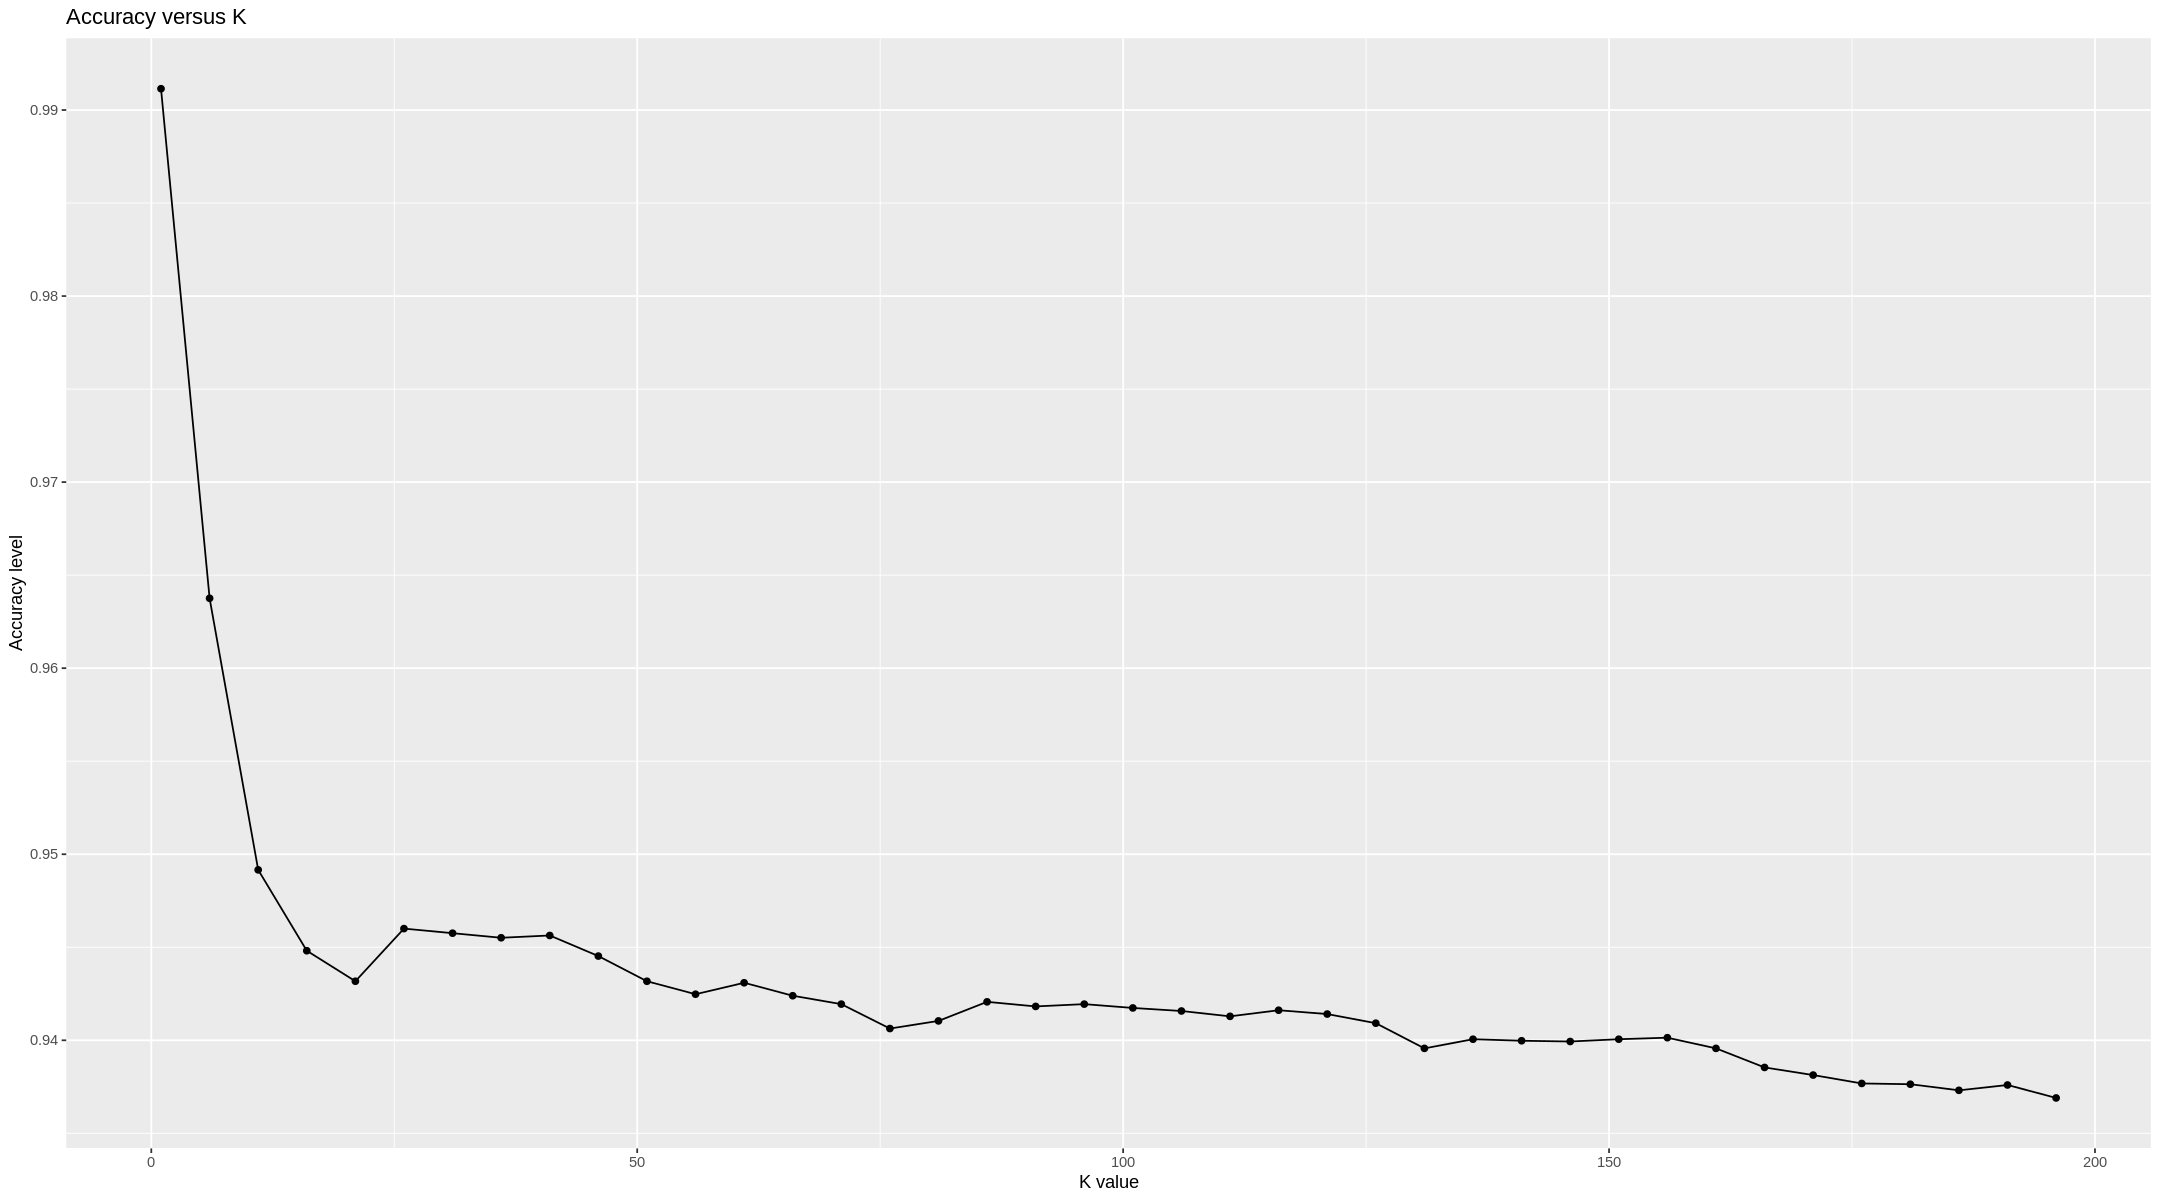

In [33]:
options(repr.plot.width=18, repr.plot.height=10)
accuracies_lots <- choose_k$results
accuracy_vs_k_lots <- ggplot(accuracies_lots, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()+
  xlab("K value")+
  ylab("Accuracy level")+
  ggtitle("Accuracy versus K")
accuracy_vs_k_lots

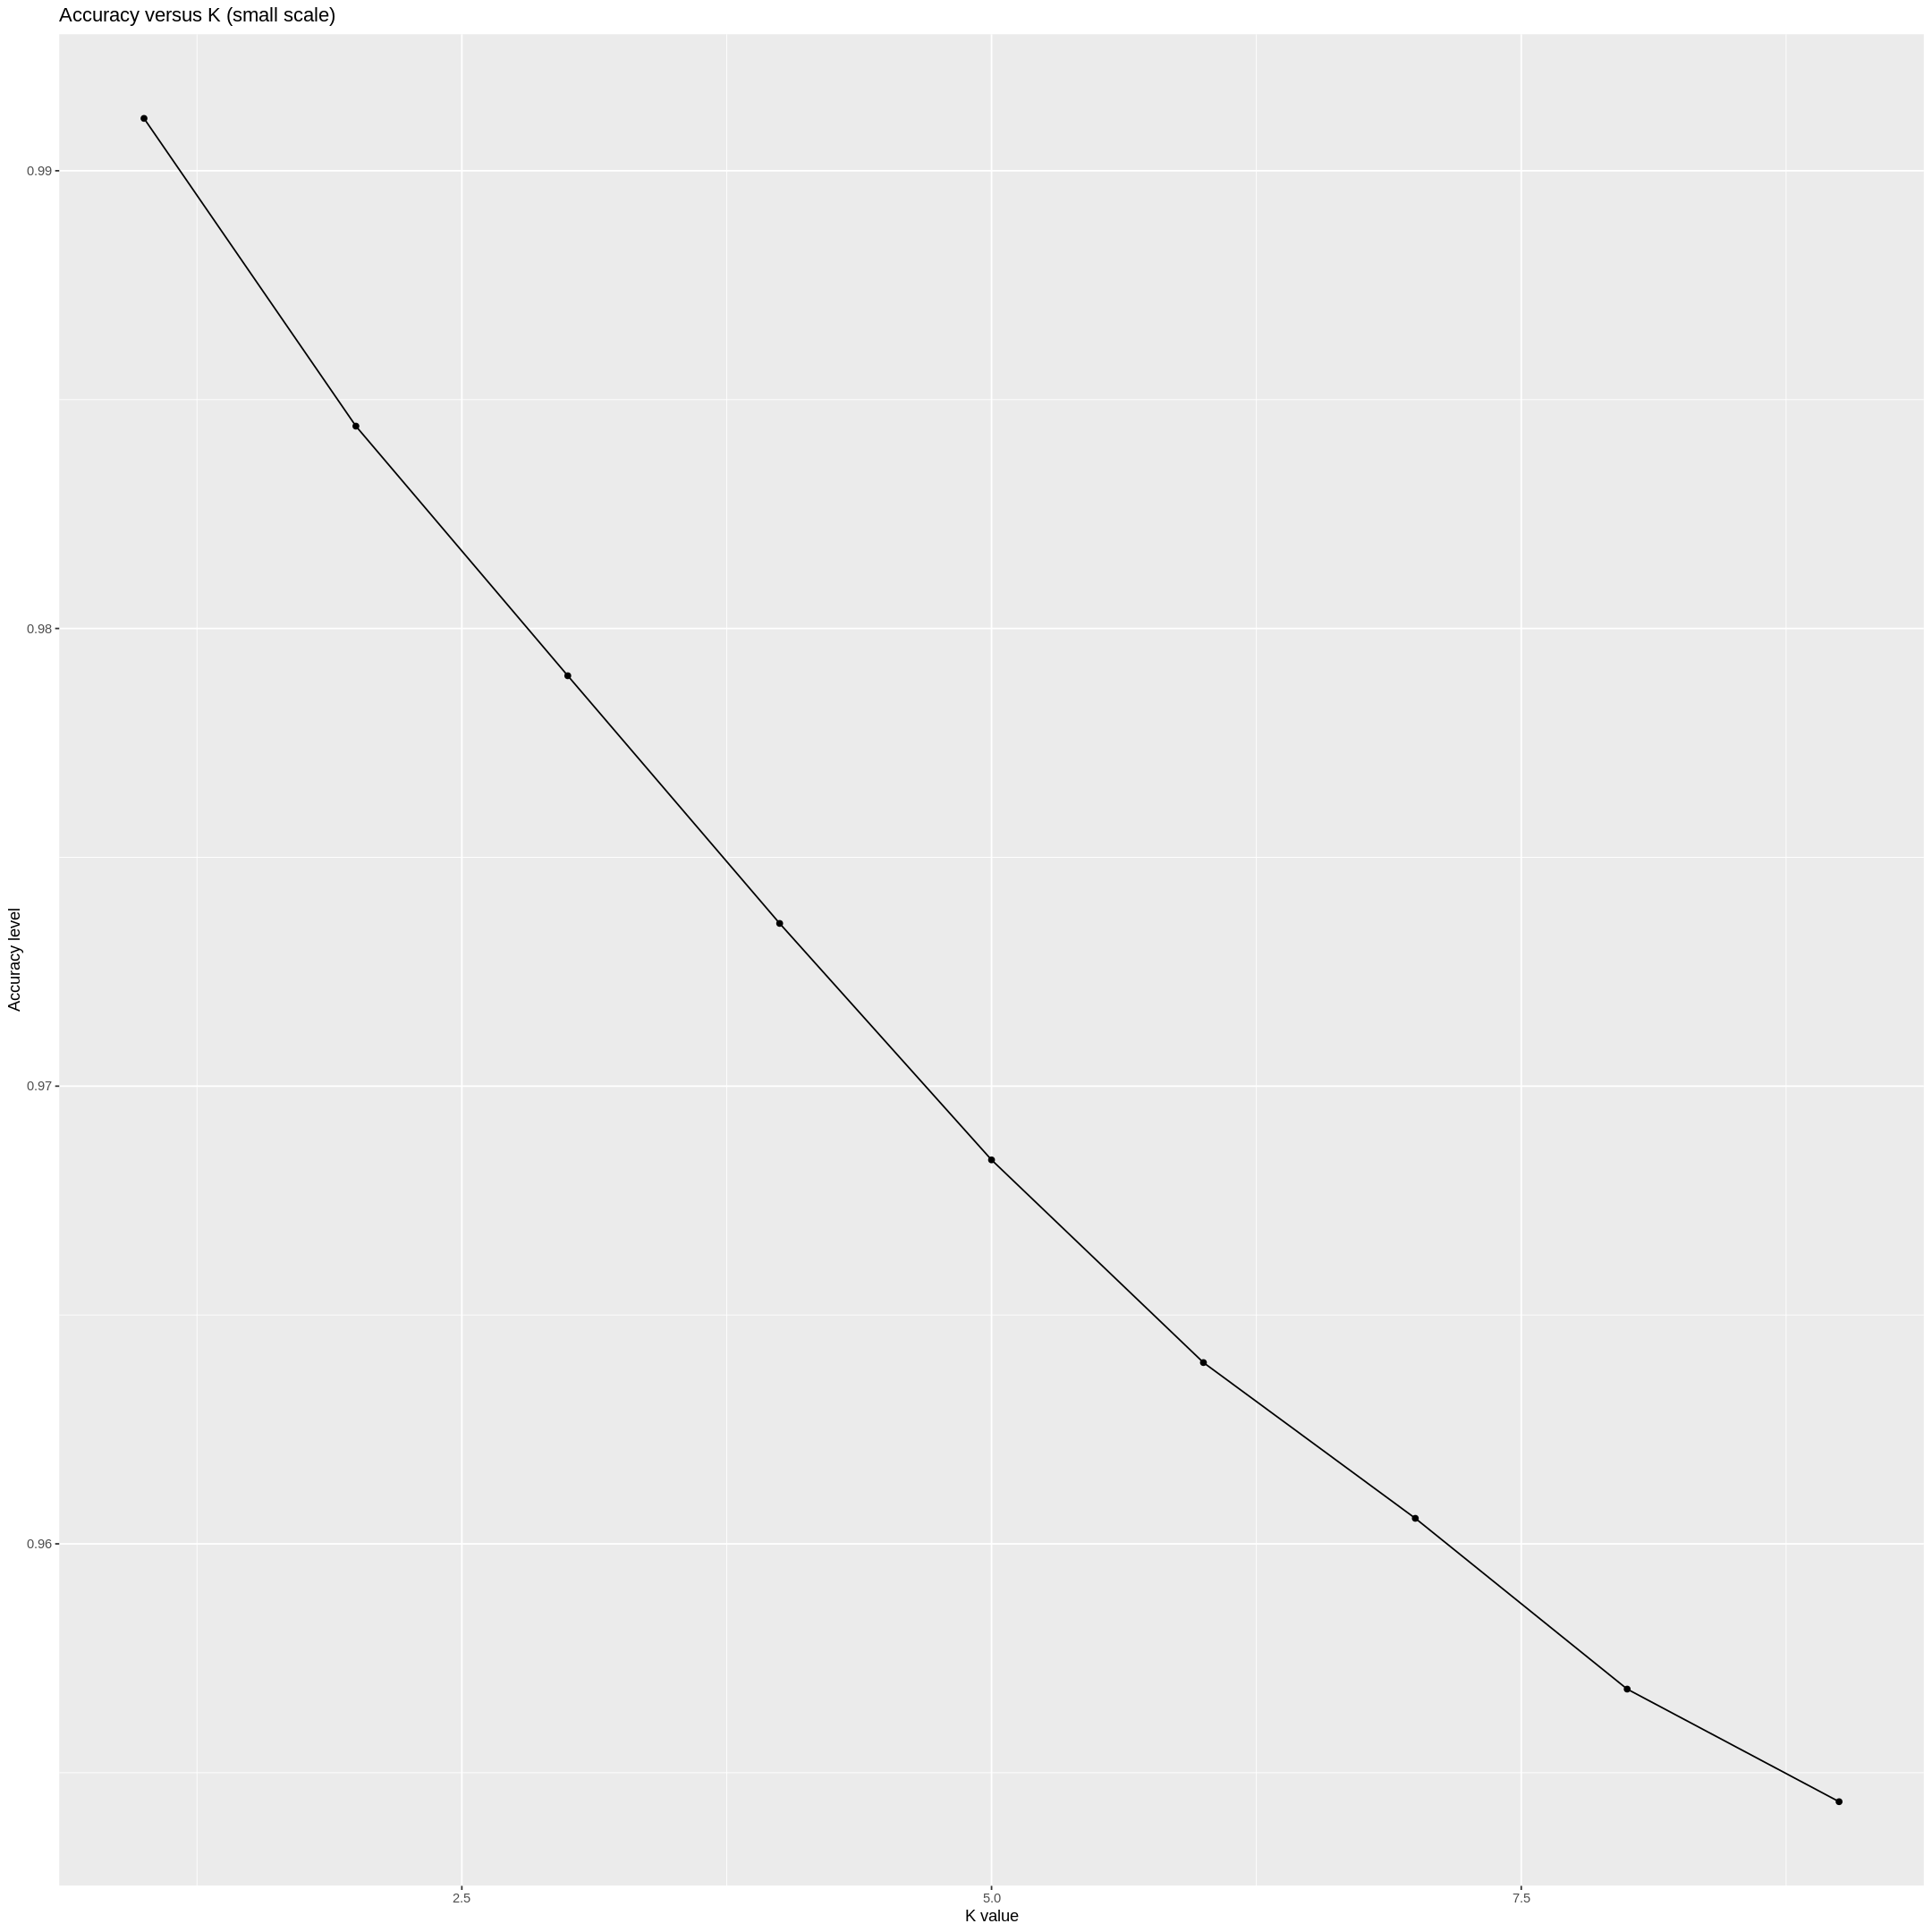

In [14]:
train_control <- trainControl(method = "cv", number = 10)
# Set the seed.
set.seed(1234) 
ks <- data.frame(k=seq(from=1, to =9, by =1))
choose_k <- train(x = X_train, y = Y_train, method="knn", tuneGrid = ks, trControl = train_control)

accuracies_lots <- choose_k$results
accuracy_vs_k_lots <- ggplot(accuracies_lots, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()+
  xlab("K value")+
  ylab("Accuracy level")+
  ggtitle("Accuracy versus K (small scale)")
accuracy_vs_k_lots

It is obvious in the plot that the accuracy level peaks when $k=1$. Thus we would like to choose $k=1$ for our final knn classification model. Even for a small scale, which means k varies from 1 to 5, we found that $k=1$ remained the best $k$ we could have. 

- Now that we have explored our data, separated the data into training and testing sets and applied cross-validation to choose the best $k$, we can build our final model.
- Then we use our final model to predict the testing set and report the accuracy of this prediction.

In [27]:
set.seed(1235)
# set the seed.
k <- data.frame(k = 1)
model_knn_final <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)

X_test <- testing_set %>% 
  select(-class) %>% 
  data.frame()

Y_test <- testing_set %>% 
  select(class) %>% 
  unlist()

Y_test_predicted <- predict(object = model_knn_final, X_test)

model_quality <- confusionMatrix(data = Y_test_predicted, reference = Y_test)
model_quality

Confusion Matrix and Statistics

          Reference
Prediction Negative Positive
  Negative     3988       63
  Positive       76      346
                                          
               Accuracy : 0.9689          
                 95% CI : (0.9634, 0.9738)
    No Information Rate : 0.9086          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8156          
                                          
 Mcnemar's Test P-Value : 0.3088          
                                          
            Sensitivity : 0.9813          
            Specificity : 0.8460          
         Pos Pred Value : 0.9844          
         Neg Pred Value : 0.8199          
             Prevalence : 0.9086          
         Detection Rate : 0.8916          
   Detection Prevalence : 0.9057          
      Balanced Accuracy : 0.9136          
                                          
       'Positive' Class : Negative        


From a value of accuracy of around 0.969, we can conclude that this knn classifier generally did a good job predicting a pulsar since our classifier predicted the correct class label on roughly 96.9% of the examples.

After applying the classifier on the test set, we can extract the predicted class column and combine it with the original test set. In addition, we summarize the number of observations that have been correctly predicted and the number of observations that have not. A barchart is the best choice to plot numeric variables versus categorical variables.

y_true,y_pred,Freq,prediction
<chr>,<chr>,<int>,<chr>
Negative,Negative,3988,Correct
Positive,Negative,63,Incorrect
Negative,Positive,76,Incorrect
Positive,Positive,346,Correct


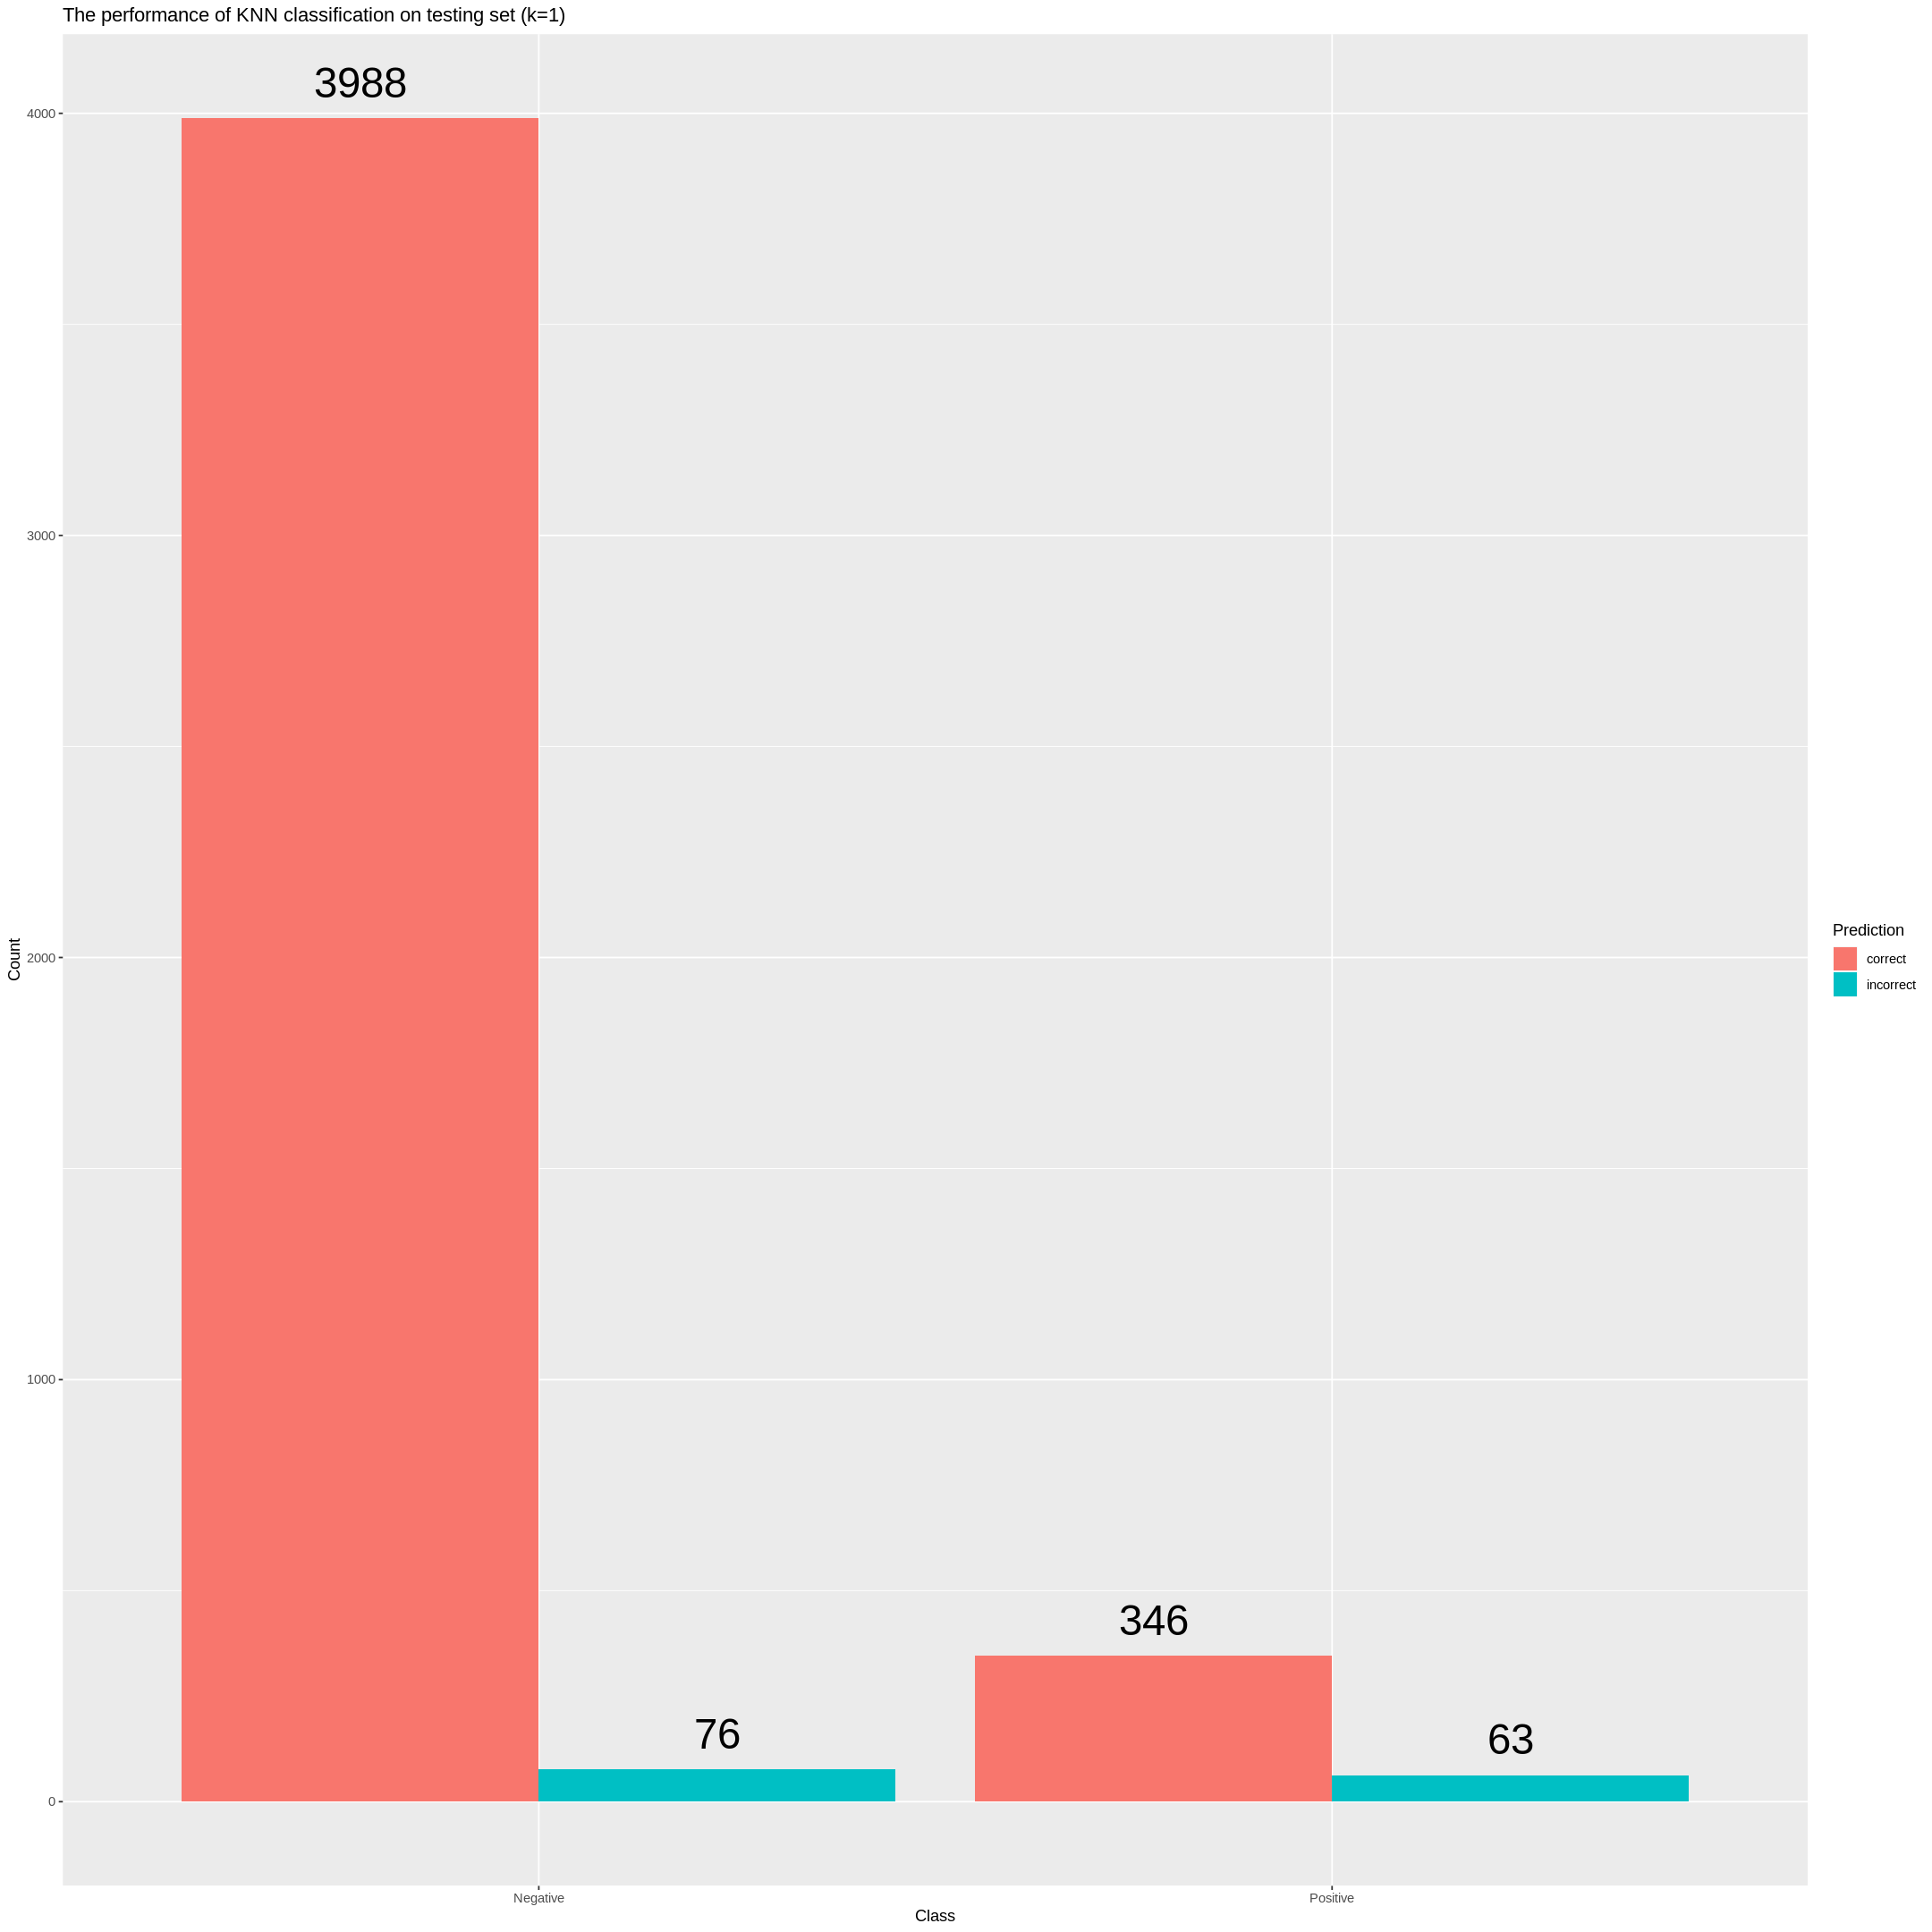

In [38]:
df_result <- ConfusionDF(Y_test_predicted, Y_test) %>%
             mutate(prediction = ifelse (y_true == y_pred,"Correct","Incorrect"))
df_result
#visualize the result
plot_final <- ggplot(df_result, aes(x=y_true,y=Freq, fill=prediction))+
            geom_bar(stat="identity", position=position_dodge())+
            xlab("Class")+
            ylab("Count")+
            ggtitle("The performance of KNN classification on testing set (k=1)")+
            scale_fill_discrete(name = "Prediction", labels = c("correct", "incorrect"))+
            geom_text(aes(label=Freq), vjust=-0.7,position = position_dodge(0.9), size=10)
plot_final

## Discussion

- In summary, it is ideal to train the classifier with four predictors we select. Also, data preprocessing plays a significant role in the knn classification. Our classifier performs well when predicting a pulsar based on its profiles, approaching an accuracy of 92.7%. For the improvement, we can include various data from different datasets although we need advanced equipment. In addition, we can evaluate how many predictors and which of them we should utilize to increase the accuracy of the classifier while predicting the labels. However, we could only achieve the goals above by studying further in statistics.

- The outcome is approximately what we expected to find. The main issue is that we are choosing $k=1$ as a parameter for our knn classifier. It is reasonably to conclude that the classifier tends to be too sensitive coping with the data set. It will definitely overplot the data though it shows the highest accuracy. To address this concern, there are multiple tools we can implement and even other classifcation methods which are beyond the scope of this course.

The goal of this investigation is to train the classifier algorithm so that it is able to sift through candidate data and differentiate between RFI noise and pulsars. There is already a similar classification system called the pipeline, which processes large amounts of data to isolate prospective candidates. This pipeline utilizes all the potential variables to separate candidates into their respective classes. Our goal is to find a simpler way to classify the data using fewer variables but hopefully obtain similar classification standards. This more efficient approach might allow for less computing power and optimized speed which is critical. One of the concerns with the more efficient approach was whether the accuracy of the classification would be lowered, yet our system was 96.9% accurate. Later on in the course, we learnt about the regression, clustering and statical inference, but they are all dealing with other aspects of the statistic problem which is irrelevant to this classification problem.

>Note: We can use the spread od our bootstrap distribution to calculate our plausible range (confidence intervals). Then we can report both our sample point estimate and the plausible range where we expect out true population quantity to fall.
 
 | Methods | Description |
|-------------------|---------------|
|          Regression         |    Predict a numeric value   |
|        Clustering           |    Data analysis task involving separating a data set into subgroups of related data   |
|        Statistical inference          |     Process of using a sample to make conclusions about the wider population the sample come from   |
|   Bootstrapping                |     Confidence interval   |


Pulsars are a unique tool of science as they not only contain the most extreme physical environments, but they can be used to detect gravitational waves. Discovering more pulsars will allow us to ask and answer questions about the core theories of physics and our universe.

**Future questions:**
- When selecting the variables as our predictors, how can we choose those that are related to the class labels the most?
- Are there any classification methods other than knn behaving better in predicting a pulsar?
- In general, when will our knn classifier perform the best? How does this classification system behave in practice? 
- Determine how to classify and remove the Gaussian, Brownian noise from the data to get more isolated data.


## References

- V. Priyanka, B. S. Anil and B. R. Dinakar, "A Comparative Study of Binary Classification Methods for Pulsar Detection," 2018 International Conference on Electrical, Electronics, Communication, Computer, and Optimization Techniques (ICEECCOT), Msyuru, India, 2018, pp. 345-349.
- R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: 10.1093/mnras/stw656 
- Lyon, Robert James. Why are pulsars hard to find?. Diss. The University of Manchester (United Kingdom), 2016.